### Class Disparity

**Under Sampling**  
- Random under-sampling : 작은 비중의 클래스와 관측치 비율이 유사해질 때ㅐ까지 무작위로 큰 비중의 클래스의 관측치를 제거하는 단순한 방식이다.  
- EasyEnsemble : 일종의 앙상블 기법으로, 큰 비중의 클래스를, 작은 비중의 클래스와 동일한 크기의 N개 데이터셋으로 분리한다. 그런 다음, 분리한 데이터셋과 작은 비중의 데이터셋으로 총 N번 학습한다. 그다음 마지막으로 N개의 모든 모델의 결과값을 종합하여 최종 분류 모델을 만든다. 일반적으로는 분류 가중치의 평균을 구하여 최종 분류값을 산출한다.  
- Condensed Nearest Neighbor(CNN) : K-Nearest Neighbor 모델을 차용한 방법으로, 비중이 큰 클래스의 관측치 중 비중이 적은 클래스와 속성값이 확연히 다른 관측치들을 제거하여 학습에 사용하지 않아도 되는 관측치를 제거하는 것이다.

**Over Sampling**  
- Random over-sampling : 작은 클래스의 관측치를 무작위로 선택하여 반복 추출하는 방식이다. 관측치를 반복 추출하는 만큼 표본의 크기는 커지지만, 단순히 동일한 관측치가 복제되는 것이기 때문에 정보의 양은 증가하지 않는다. 따라서 정보의 손실은 없지만 모델의 overfitting 발생할 수 있다.  
- Synthetic Minority Over-Sampling Technique(SMOTE) : SMOTE 방식은 K-Nearest Neighbors 기법을 사용한다. 비중이 작은 클래스의 관측치의 K 최근접 이웃 관측치들을 찾아서, 해당 관측치와 K개 이웃 관측치들 사이의 값을 가진 새로운 관측치들을 생성한다.  
- Adaptive Synthetic Sampling Approach(ADASYN) : 기존 SMOTE 방식에 over sampling할 관측치의 양을 체계적으로 조절할 수 있다.  

Over samping을 적용할 때에는 먼저 학습셋과 테스트셋을 분리한 다음에 적용을 해야 한다. 그렇지 않으면 학습 셋과 테스트 셋에 동일한 데이터가 들어가서 overfitting이 발생할 수 있다.

In [1]:
!pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [2]:
# https://www.kaggle.com/datasets/dragonheir/logistic-regression
df = pd.read_csv("../input/logistic-regression/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


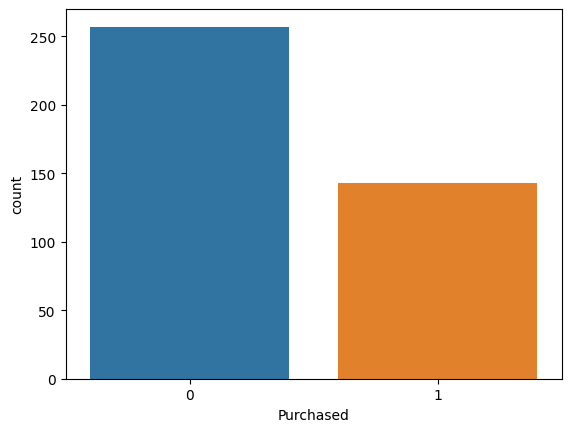

In [5]:
# Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=df)

plt.show()

In [6]:
# Gender 컬럼 가변수 처리

df_d = pd.get_dummies(df['Gender'])

df2 = pd.merge(df.drop(['Gender'], axis=1), 
               df_d['Male'],left_index=True, right_index=True,how = 'inner')

df2.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


*Over sampling과 Under sampling을 하려면 문자형 변수를 dummy variables로 바꿔 줘야 한다.*

In [7]:
# 데이터셋 학습셋, 테스트셋 분리

X = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

X_train.head()

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,True
87,15631912,28,85000,False
357,15671387,41,72000,False
355,15606472,60,34000,True
238,15617877,46,82000,False


In [9]:
# Under sampling  
X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train,y_train)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['Purchased']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (300, 4) (300, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (224, 4) (224, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 Purchased
0    112
1    112
Name: count, dtype: int64


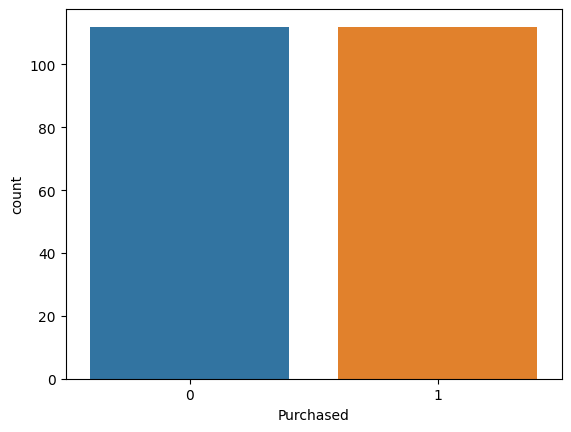

In [11]:
# Under sampling 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_under)

plt.show()

In [12]:
# Over sampling 적용

smote = SMOTE(k_neighbors = 2, random_state=0)
oversample = SMOTE()

X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트: '
      , X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_over['Purchased']).value_counts())

SMOTE 적용 전 학습용 변수/레이블 데이터 세트:  (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트:  (376, 4) (376, 1)
SMOTE 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 Purchased
0    188
1    188
Name: count, dtype: int64


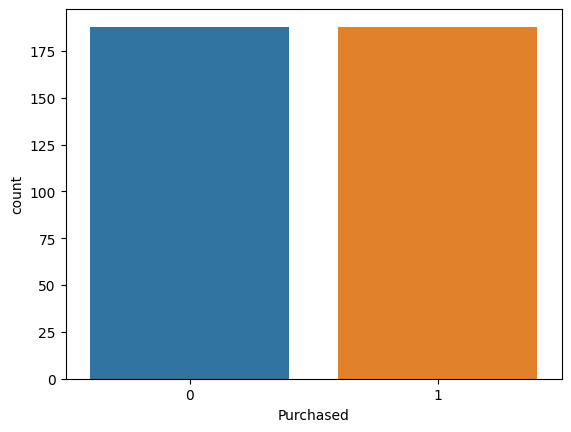

In [13]:
# Over sampling 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_over)

plt.show()

In [14]:
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 57 to 265
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Purchased  300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [15]:
X_train_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          224 non-null    int64
 1   Age              224 non-null    int64
 2   EstimatedSalary  224 non-null    int64
 3   Male             224 non-null    bool 
dtypes: bool(1), int64(3)
memory usage: 5.6 KB
